# FastICA Algorithm Implementation

In [1]:
import librosa as lb
import soundfile as sf
from sklearn.decomposition import FastICA
import numpy as np
from matplotlib import pyplot as plt

##### reading the input files, one with music dominated and other with voice dominated
source 1: voice dominated and source 2: music dominated

In [28]:
voice, Vfs = sf.read('/Users/rajeshr/Desktop/VoiceDominated.wav')
print('Voice: length = {} and sampling freq : = {} '.format(len(voice), Vfs))

music, Mfs = sf.read('/Users/rajeshr/Desktop/MusicDominated.wav')
print('Music: length = {} and sampling freq : = {}  '.format(len(music), Mfs))
print(voice.shape, music.shape)

Voice: length = 844288 and sampling freq : = 48000 
Music: length = 844288 and sampling freq : = 48000  
(844288, 2) (844288, 2)


##### slicing it into same length and same number of channels (1D)

In [29]:
if len(voice) > len(music):
    voice = voice[:len(music)]
else:
    music = music[:len(voice)]
    
print('After Slicing Length & channels\nVoice = {}, Music = {}'.format(len(voice), len(music)))

#print(voice.shape, music.shape)
a, b = voice.T   #.mpeg has 2 channels. so taking the average
voice = (a+b)/2

c, d = music.T   #.mpeg has 2 channels. so taking the average
music = (c+d)/2
print(voice.shape, music.shape)

After Slicing Length & channels
Voice = 844288, Music = 844288
(844288,) (844288,)


##### Plotting graphs

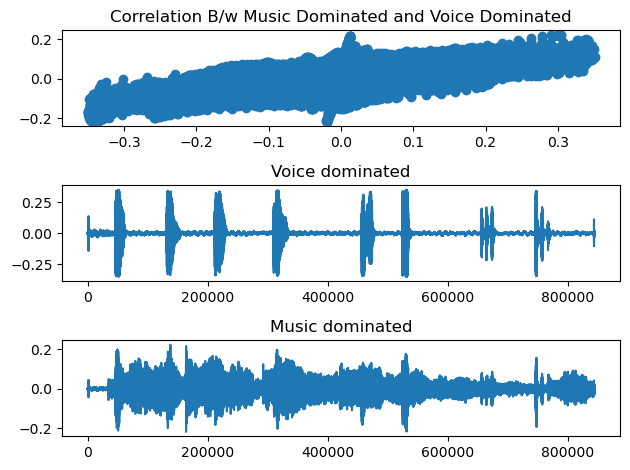

In [30]:
plt.subplot(3, 1, 1)
plt.scatter(voice, music)
plt.title('Correlation B/w Music Dominated and Voice Dominated')

plt.subplot(3, 1, 2)
x = np.arange(len(voice))
plt.plot(x, voice)
plt.title('Voice dominated')

plt.subplot(3, 1, 3)
plt.plot(x, music)
plt.title('Music dominated')
plt.tight_layout()
plt.show()

### Performing ICA

MIXING MATRIX A
 [[ 38.78620472  -1.94404575]
 [ 13.15945879 -28.35456649]]


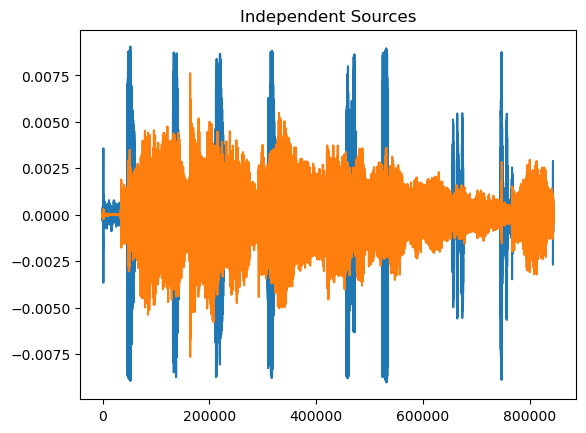

In [38]:
combinedSignals = np.c_[voice, music]

ica = FastICA(n_components=2)
S_ = ica.fit_transform(combinedSignals)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix
print('MIXING MATRIX A\n', A_)

xs = np.arange(len(S_))
plt.plot(xs, S_)
plt.title('Independent Sources')
plt.show()

voice_comp, music_comp = S_.T

##### Writing individual .wav files

In [39]:
sf.write('/Users/rajeshr/Desktop/voice_comp.wav', voice_comp, Vfs)
sf.write('/Users/rajeshr/Desktop/music_comp.wav', music_comp, Mfs)

##### Plotting Input vs Output 

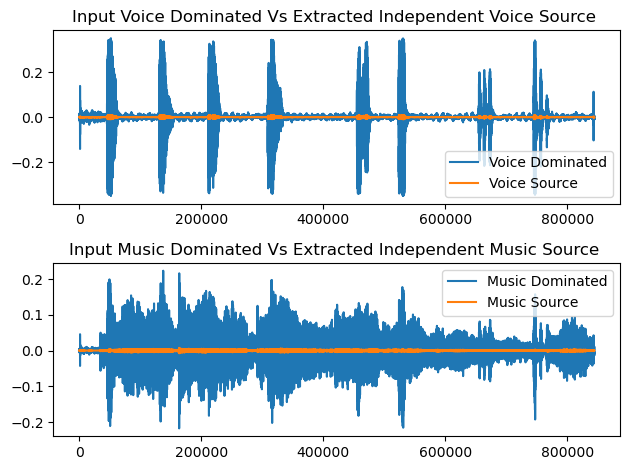

In [43]:
plt.subplot(2, 1, 1)
plt.plot(x, voice)
plt.plot(x, voice_comp)
plt.legend(['Voice Dominated','Voice Source'])
plt.title('Input Voice Dominated Vs Extracted Independent Voice Source ')

plt.subplot(2, 1, 2)
plt.plot(x, music)
plt.plot(x, music_comp)
plt.legend(['Music Dominated','Music Source'])
plt.title('Input Music Dominated Vs Extracted Independent Music Source ')
plt.tight_layout()
plt.show()

# Using Spectogram

In [13]:
import scipy
from scipy import signal
import cmath

In [2]:
voice, Vfs = sf.read('/Users/rajeshr/Desktop/VoiceDominated.wav')
print('Voice: length = {} and sampling freq : = {} '.format(len(voice), Vfs))

music, Mfs = sf.read('/Users/rajeshr/Desktop/MusicDominated.wav')
print('Music: length = {} and sampling freq : = {}  '.format(len(music), Mfs))
print(voice.shape, music.shape)

Voice: length = 844288 and sampling freq : = 48000 
Music: length = 844288 and sampling freq : = 48000  
(844288, 2) (844288, 2)


In [3]:
if len(voice) > len(music):
    voice = voice[:len(music)]
else:
    music = music[:len(voice)]
    
print('After Slicing Length & channels\nVoice = {}, Music = {}'.format(len(voice), len(music)))

#print(voice.shape, music.shape)
a, b = voice.T   #.mpeg has 2 channels. so taking the average
voice = (a+b)/2

c, d = music.T   #.mpeg has 2 channels. so taking the average
music = (c+d)/2
print(voice.shape, music.shape)

After Slicing Length & channels
Voice = 844288, Music = 844288
(844288,) (844288,)


In [21]:
Vf, Vt, Vxx = scipy.signal.stft(voice, fs=Vfs, window='hann')
Mf, Mt, Mxx = scipy.signal.stft(music, fs=Mfs, window='hann')
abs(Vxx).shape

(129, 6597)

In [20]:
Vangle = np.angle(Vxx)
Mangle = np.angle(Mxx)
Vangle.shape

(129, 6597)

In [22]:
combinedSignals = np.c_[abs(Vxx), abs(Mxx)]

ica = FastICA(n_components=2)
S_ = ica.fit_transform(combinedSignals)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix
#print('MIXING MATRIX A\n', A_)

xs = np.arange(len(S_))
#plt.plot(xs, S_)
#plt.title('Independent Sources')
#plt.show()

V_comp, M_comp = S_.T
combinedSignals.shape

(129, 13194)

In [19]:
V_comp.shape

(129,)

In [18]:
Voice_comp = []    
for i in range(len(V_comp)):
    print(V_comp[i], Vangle[i])
    Voice_comp.append(cmath.rect(V_comp[i], Vangle[i]))

0.26919114719717646 [0.         3.14159265 3.14159265 ... 3.14159265 3.14159265 3.14159265]


TypeError: only size-1 arrays can be converted to Python scalars